# Tobacco Use and Mortality (2004-2015) - Hospital Admissions Analysis

This project analyzes tobacco-related hospital admissions in England using data from Kaggle.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Loading

In [44]:
admissions = pd.read_csv("admissions.csv")
admissions.head()

,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157


## 2. Dataset Overview

In [45]:
admissions.shape

(2079, 7)

In [46]:
admissions.columns

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Metric',
       'Sex', 'Value'],
      dtype='object')

In [48]:
admissions.isnull().sum()

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64

## 3. Data Cleaning

The `Value` column contains non-numeric values and missing data.
These are cleaned before analysis.

In [50]:
admissions['Value'] = pd.to_numeric(admissions['Value'], errors='coerce')
admissions = admissions.dropna(subset=['Value'])

admissions.isnull().sum()

Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                692
Value                0
dtype: int64

## 4. Exploratory Data Analysis (EDA)

### Total Tobacco-Related Admissions per Year

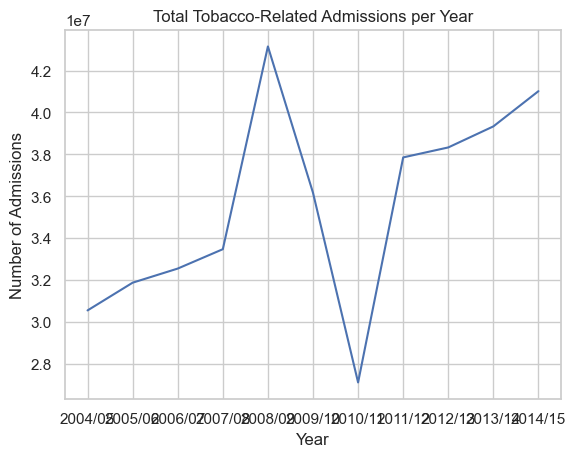

In [52]:
yearly_admissions = admissions.groupby('Year')['Value'].sum()

plt.figure()
plt.plot(yearly_admissions.index, yearly_admissions.values)
plt.title("Total Tobacco-Related Admissions per Year")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.show()

**Insight:**  
Hospital admissions related to tobacco use increase over time.

### Admissions by Diagnosis Type

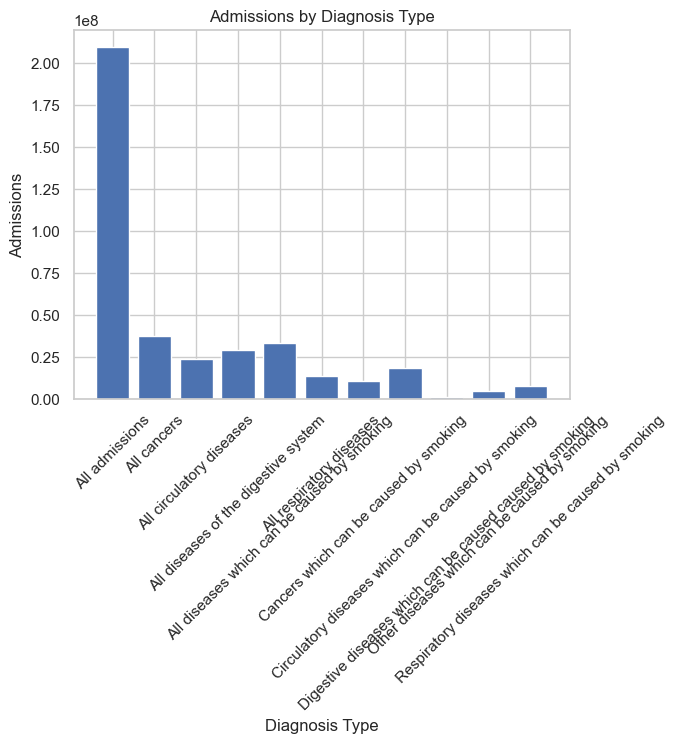

In [54]:
diagnosis_totals = admissions.groupby('Diagnosis Type')['Value'].sum()

plt.figure()
plt.bar(diagnosis_totals.index, diagnosis_totals.values)
plt.title("Admissions by Diagnosis Type")
plt.xlabel("Diagnosis Type")
plt.ylabel("Admissions")
plt.xticks(rotation=45)
plt.show()


**Insight:**  
Primary diagnoses account for the majority of tobacco-related admissions.

### Admissions by Sex

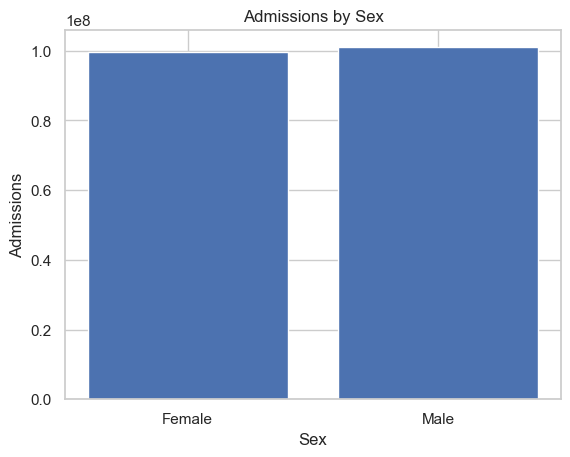

In [57]:
sex_totals = admissions.groupby('Sex')['Value'].sum()

plt.figure()
plt.bar(sex_totals.index, sex_totals.values)
plt.title("Admissions by Sex")
plt.xlabel("Sex")
plt.ylabel("Admissions")
plt.show()


**Insight:**  
Admissions differ by sex, suggesting demographic variation in tobacco-related health outcomes.

## Conclusion

This analysis explored tobacco-related hospital admissions in England from 2004 to 2015.
The results show a growing healthcare burden associated with tobacco use and emphasize the importance of public health interventions.